In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Desktop/international_matches.csv')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(23921, 25)

In [5]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [6]:
df2 = df.dropna()
df2.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [7]:
df2.shape

(4303, 25)

# Is there really such a thing as a home team advantage?


In [8]:
teams = df2[['date','home_team_score','away_team_score']] #selecting the required columns
teams

,date,home_team_score,away_team_score
8264,2004-09-03,1,1
8266,2004-09-04,2,2
8271,2004-09-04,3,0
8276,2004-09-04,1,3
8278,2004-09-04,2,1
...,...,...,...
23909,2022-06-14,0,1
23911,2022-06-14,1,1
23912,2022-06-14,3,2
23913,2022-06-14,0,3


In [9]:
teams['home_team_score']>teams['away_team_score'] # setting the conditions for the homewins to get the number of times home team wins 
homewins = teams.loc[teams['home_team_score']>teams['away_team_score']]
homewins

,date,home_team_score,away_team_score
8271,2004-09-04,3,0
8278,2004-09-04,2,1
8314,2004-09-08,1,0
8322,2004-09-08,3,2
8335,2004-09-08,2,0
...,...,...,...
23884,2022-06-13,2,0
23890,2022-06-14,1,0
23907,2022-06-14,5,2
23908,2022-06-14,3,2


In [10]:
teams['home_team_score']<teams['away_team_score'] # setting the conditions for the homeloss to get the number of times home team 
homeloss = teams.loc[teams['home_team_score']<teams['away_team_score']]
homeloss

,date,home_team_score,away_team_score
8276,2004-09-04,1,3
8284,2004-09-04,0,3
8339,2004-09-08,1,2
8345,2004-09-08,0,1
8370,2004-10-09,1,3
...,...,...,...
23875,2022-06-12,1,2
23885,2022-06-13,0,1
23906,2022-06-14,0,4
23909,2022-06-14,0,1


In [11]:
home_ad = homewins[['date', 'home_team_score', 'away_team_score']].rename(columns = {'home_team_score': 'Home_team_win', 'away_team_score' :'Home_team_loss'})
away_ad = homeloss[['date', 'home_team_score', 'away_team_score']].rename(columns = {'home_team_score': 'Home_team_win', 'away_team_score' :'Home_team_loss'})
home_advantage = home_ad.append(away_ad)
home_advantage #merging the two dataset and making a new one for a clear view of home wins and losses

,date,Home_team_win,Home_team_loss
8271,2004-09-04,3,0
8278,2004-09-04,2,1
8314,2004-09-08,1,0
8322,2004-09-08,3,2
8335,2004-09-08,2,0
...,...,...,...
23875,2022-06-12,1,2
23885,2022-06-13,0,1
23906,2022-06-14,0,4
23909,2022-06-14,0,1


In [12]:
home_advantage.mean() #taking the mean of whole dataset with individual column

C:\Users\Abhishek\AppData\Local\Temp/ipykernel_17732/741599208.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  home_advantage.mean() #taking the mean of whole dataset with individual column


Home_team_win     1.618684
Home_team_loss    1.134731
dtype: float64

C:\Users\Abhishek\AppData\Local\Temp/ipykernel_17732/3004423302.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  home_advantage.mean().plot(kind='pie', title='Home Advantage', labels =['Home team wins','Home team loss'], figsize=(6,6))


<AxesSubplot:title={'center':'Home Advantage'}, ylabel='None'>

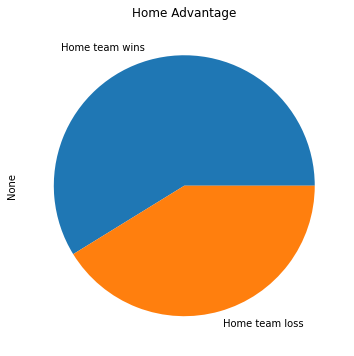

In [14]:
home_advantage.mean().plot(kind='pie', title='Home Advantage', labels =['Home team wins','Home team loss'], figsize=(6,6))
#plt.legend(); #plotting the mean for visualization 

# What team has the strongest defense and midfield?

In [19]:
#create a home and away defense table and  merge both defense tables.

home_defense = df2[['date','home_team','home_team_mean_defense_score']].rename(columns= {'home_team':'team','home_team_mean_defense_score':'defense_score'})
home_defense

away_defense = df2[['date','away_team','away_team_mean_offense_score']].rename(columns= {'away_team':'team','away_team_mean_offense_score':'defense_score'})
away_defense

#merge both tables
defense = home_defense.append(away_defense)

#drop nun values in the defense score column.

defense

,date,team,defense_score
8264,2004-09-03,Spain,86.5
8266,2004-09-04,Austria,76.2
8271,2004-09-04,Croatia,80.5
8276,2004-09-04,Iceland,68.8
8278,2004-09-04,Italy,91.8
...,...,...,...
23909,2022-06-14,Belgium,85.7
23911,2022-06-14,Republic of Ireland,72.7
23912,2022-06-14,Finland,72.3
23913,2022-06-14,Montenegro,74.7


In [25]:

#sort the values 

defense_top = defense.sort_values(by=['team'],ascending = [True])
defense_top

,date,team,defense_score
22597,2021-06-08,Albania,68.7
22924,2021-09-05,Albania,76.2
18746,2016-06-19,Albania,69.7
23754,2022-06-06,Albania,70.0
21546,2019-09-10,Albania,74.2
...,...,...,...
23723,2022-06-05,Wales,75.0
16839,2014-06-04,Wales,69.7
20689,2018-10-16,Wales,77.7
15934,2013-03-26,Wales,74.2


In [26]:
top_10_defense = defense_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'defense_score')
top_10_defense #Only consider certain columns for identifying duplicates, by default use all of the columns. 
                #keep{'first', 'last', False}, default 'first' Determines which duplicates (if any) to 
               #keep. - first : Drop duplicates except for the first occurrence. - last : Drop duplicates except for the last occurrence.

,date,team,defense_score
9993,2006-10-11,England,87.3
13181,2010-06-16,Spain,85.0
23211,2021-11-12,Italy,84.2
15933,2013-03-26,Colombia,84.0
9575,2006-05-23,Uruguay,83.7
9482,2006-03-01,Sweden,83.3
23793,2022-06-08,Netherlands,83.0
18745,2016-06-19,France,82.8
22988,2021-09-08,Germany,82.7
16217,2013-08-14,Brazil,82.3


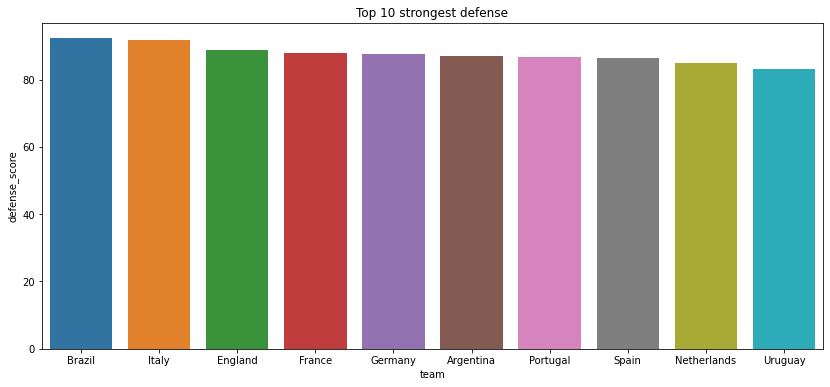

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sn
plt.figure(figsize=(14,6))
plt.title("Top 10 strongest defense")
sn.barplot(data=defense_top_10, x='team',y='defense_score');

In [30]:
home_midfield = df2[['date','home_team','home_team_mean_midfield_score']].rename(columns={'home_team':'team','home_team_mean_midfield_score':'midfield score'})
home_midfield

away_midfield = df2[['date','away_team','away_team_mean_midfield_score']].rename(columns={'away_team':'team','away_team_mean_midfield_score':'midfield score'})
away_midfield

midfield = home_midfield.append(away_midfield)
midfield

,date,team,midfield score
8264,2004-09-03,Spain,89.5
8266,2004-09-04,Austria,74.0
8271,2004-09-04,Croatia,79.0
8276,2004-09-04,Iceland,69.2
8278,2004-09-04,Italy,87.5
...,...,...,...
23909,2022-06-14,Belgium,85.5
23911,2022-06-14,Republic of Ireland,73.8
23912,2022-06-14,Finland,73.5
23913,2022-06-14,Montenegro,68.2


In [31]:

midfield_top = midfield.sort_values(by=['team'],ascending = [True])
midfield_top

,date,team,midfield score
22597,2021-06-08,Albania,70.2
22924,2021-09-05,Albania,73.0
18746,2016-06-19,Albania,72.0
23754,2022-06-06,Albania,73.0
21546,2019-09-10,Albania,71.2
...,...,...,...
23723,2022-06-05,Wales,78.5
16839,2014-06-04,Wales,79.5
20689,2018-10-16,Wales,76.2
15934,2013-03-26,Wales,77.2


In [32]:


top_10_midfield = midfield_top.drop_duplicates(subset=["team"], keep='last').nlargest(10, 'midfield score')
top_10_midfield

,date,team,midfield score
9993,2006-10-11,England,88.0
22988,2021-09-08,Germany,87.8
13181,2010-06-16,Spain,87.0
18745,2016-06-19,France,85.0
23211,2021-11-12,Italy,84.5
21908,2019-11-18,Argentina,84.2
23885,2022-06-13,Croatia,84.2
23793,2022-06-08,Netherlands,83.5
16217,2013-08-14,Brazil,83.2
16913,2014-06-26,Belgium,82.5


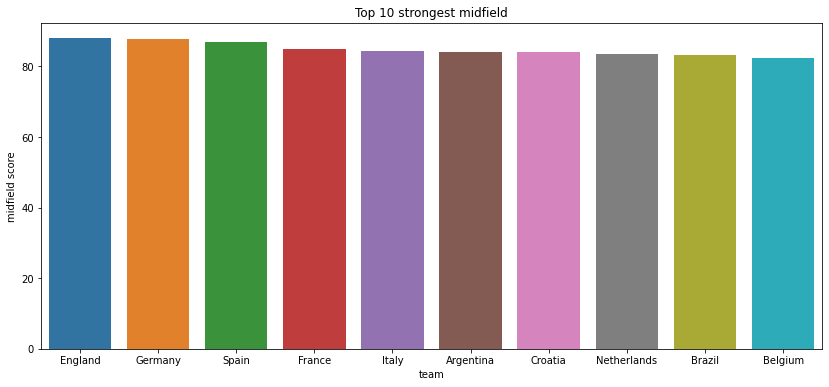

In [33]:

plt.figure(figsize=(14,6))
plt.title("Top 10 strongest midfield")
sn.barplot(data=top_10_midfield, x='team',y='midfield score');

# Most matches won according to the data

In [37]:
home_team = df2[['date','home_team','home_team_score','away_team_score']]


home_team['home_team_score']>home_team['away_team_score']
homewins = home_team.loc[home_team['home_team_score']>home_team['away_team_score']]
homewins

,date,home_team,home_team_score,away_team_score
8271,2004-09-04,Croatia,3,0
8278,2004-09-04,Italy,2,1
8314,2004-09-08,Costa Rica,1,0
8322,2004-09-08,Hungary,3,2
8335,2004-09-08,Netherlands,2,0
...,...,...,...,...
23884,2022-06-13,Denmark,2,0
23890,2022-06-14,Costa Rica,1,0
23907,2022-06-14,Germany,5,2
23908,2022-06-14,Netherlands,3,2


In [38]:
home_team['home_team_score']<home_team['away_team_score']
homeloss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
homeloss

,date,home_team,home_team_score,away_team_score
8276,2004-09-04,Iceland,1,3
8284,2004-09-04,Northern Ireland,0,3
8339,2004-09-08,Poland,1,2
8345,2004-09-08,Sweden,0,1
8370,2004-10-09,Austria,1,3
...,...,...,...,...
23875,2022-06-12,IR Iran,1,2
23885,2022-06-13,France,0,1
23906,2022-06-14,England,0,4
23909,2022-06-14,Poland,0,1


In [39]:
hometeam_wins = homewins[['date', 'home_team','home_team_score', 'away_team_score']].rename(columns = {'home_team' : 'team','home_team_score': 'Home_team_win', 'away_team_score' :'away_team_win'})
awayteam_wins = homeloss[['date', 'home_team','home_team_score', 'away_team_score']].rename(columns = {'home_team': 'team','home_team_score': 'Home_team_win', 'away_team_score' :'away_team_win'})
Team_streak = hometeam_wins.append(awayteam_wins)

Team_streak

,date,team,Home_team_win,away_team_win
8271,2004-09-04,Croatia,3,0
8278,2004-09-04,Italy,2,1
8314,2004-09-08,Costa Rica,1,0
8322,2004-09-08,Hungary,3,2
8335,2004-09-08,Netherlands,2,0
...,...,...,...,...
23875,2022-06-12,IR Iran,1,2
23885,2022-06-13,France,0,1
23906,2022-06-14,England,0,4
23909,2022-06-14,Poland,0,1


In [40]:
top_streak = Team_streak.sort_values(by=['team','date'],ascending = [False,True])
top_streak

,date,team,Home_team_win,away_team_win
8461,2004-10-13,Wales,2,3
8704,2005-02-09,Wales,2,0
8791,2005-03-26,Wales,0,2
9123,2005-09-03,Wales,0,1
9864,2006-09-05,Wales,0,2
...,...,...,...,...
21882,2019-11-17,Albania,0,2
22162,2020-11-11,Albania,2,1
22395,2021-03-28,Albania,0,2
22924,2021-09-05,Albania,1,0


In [45]:
top_streak['team'].value_counts().nlargest(10)

Mexico         94
Brazil         91
France         91
Germany        90
USA            89
Spain          82
England        82
Netherlands    77
Argentina      76
Italy          70
Name: team, dtype: int64